In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

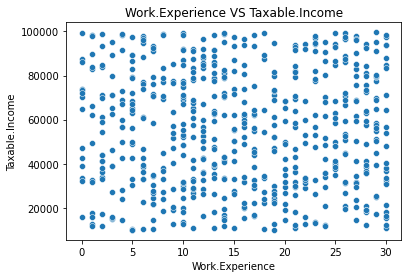

In [5]:
sns.scatterplot(x='Work.Experience',y='Taxable.Income',data = df)
plt.title('Work.Experience VS Taxable.Income')
plt.show()

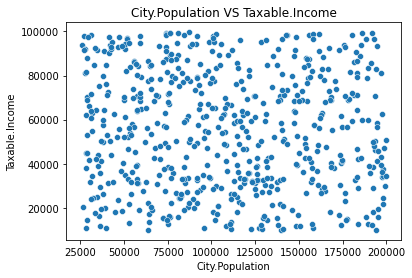

In [6]:
sns.scatterplot(x='City.Population',y='Taxable.Income',data = df)
plt.title('City.Population VS Taxable.Income')
plt.show()

## Linearity is failed

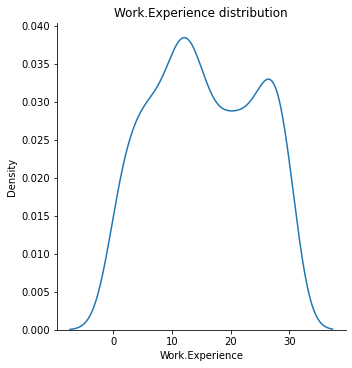

In [7]:
sns.displot(data=df,x='Work.Experience',kind='kde')
plt.title('Work.Experience distribution')
plt.show()

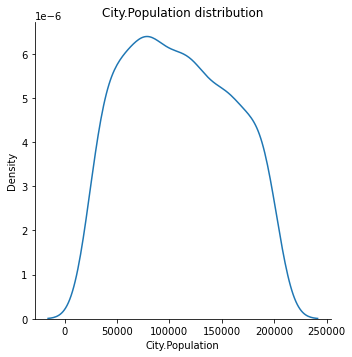

In [8]:
sns.displot(data=df,x='City.Population',kind='kde')
plt.title('City.Population distribution')
plt.show()

## Normality Test failed

In [9]:
df_corr = df.corr().round()
df_corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.0,-0.0,-0.0
City.Population,-0.0,1.0,0.0
Work.Experience,-0.0,0.0,1.0


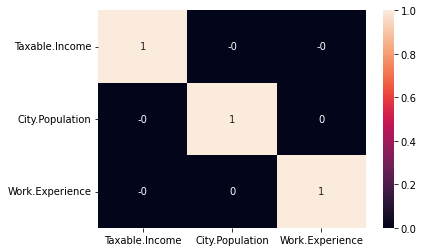

In [10]:
sns.heatmap(df_corr,annot=True)
plt.show()

## Multicollinerty test is failed

In [11]:
df = df.drop('Urban',axis = 1)

In [12]:
df = df.drop('Undergrad',axis = 1)

In [13]:
df = df.drop('Marital.Status',axis = 1)
df

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28
...,...,...,...
595,76340,39492,7
596,69967,55369,2
597,47334,154058,0
598,98592,180083,17


In [14]:
X = df.drop('Taxable.Income',axis = 1)
y = df[['Taxable.Income']]

In [15]:
X.shape,y.shape

((600, 2), (600, 1))

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [17]:
X_train.shape , X_test.shape

((480, 2), (120, 2))

In [18]:
y_train.shape , y_test.shape

((480, 1), (120, 1))

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
rf.score(X_train,y_train)

1.0

In [21]:
y_pred_train = rf.predict(X_train)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

       10003       1.00      1.00      1.00         1
       10150       1.00      1.00      1.00         1
       10163       1.00      1.00      1.00         1
       10329       1.00      1.00      1.00         1
       10348       1.00      1.00      1.00         1
       10379       1.00      1.00      1.00         1
       10455       1.00      1.00      1.00         1
       10735       1.00      1.00      1.00         1
       10870       1.00      1.00      1.00         1
       10933       1.00      1.00      1.00         1
       10987       1.00      1.00      1.00         1
       11784       1.00      1.00      1.00         1
       11794       1.00      1.00      1.00         1
       11804       1.00      1.00      1.00         1
       11865       1.00      1.00      1.00         1
       12011       1.00      1.00      1.00         1
       12453       1.00      1.00      1.00         1
       12470       1.00    

In [24]:
confusion_matrix(y_train,y_pred_train)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)